# Анализ рынка видеоигр на 2016г.   

<b>Описание исследования:</b> Интернет-магазин «Стримчик» продаёт по всему миру компьютерные игры. Для данной организации требуется провести анализ данных для увеличения прибыли компании в предстоящем 2017 году.  
    
____
<b>Цель исследования:</b> Необходимо выявить определяющие успешность игры закономерности. Это позволит сделать ставку на потенциально популярный продукт и спланировать рекламные кампании.      

____
<b>Задачи исследования:</b> Провести исследовательский анализ данных с помощью инструментов языка Python и подключенных библиотек, в т.ч. для графической визуализации. Выделить потенциально прибыльные платформы, жанры для пользователей разных регионов и представить выводы по факторам, которые могут влиять на продажи игр. Сформулировать и проверить гипотезы, интересующие заказчика, и объяснить результат.  
    
____
<b>Исходные данные:</b> Доступны исторические данные до декабря 2016 года.
  - Name — название игры
  - Platform — платформа
  - Year_of_Release — год выпуска
  - Genre — жанр игры
  - NA_sales — продажи в Северной Америке (миллионы проданных копий)
  - EU_sales — продажи в Европе (миллионы проданных копий)
  - JP_sales — продажи в Японии (миллионы проданных копий)
  - Other_sales — продажи в других странах (миллионы проданных копий)
  - Critic_Score — оценка критиков (максимум 100)
  - User_Score — оценка пользователей (максимум 10)
  - Rating — рейтинг от организации ESRB (англ. Entertainment Software Rating Board). Эта ассоциация определяет рейтинг компьютерных игр и присваивает им подходящую возрастную категорию.
    
______
**Данное исследование разделим на несколько частей.**  
*Часть 1. Изучение общей информации о данных*  
*Часть 2. Предобработка данных*  
    *Часть 3. Исследовательский анализ данных*  
    *Часть 4. Портрет пользователя каждого региона*  
    *Часть 5. Проверка гипотез*  
    *Часть 6. Общий вывод*

### Изучение общей информации о данных

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats as st
import numpy as np

pd.options.mode.chained_assignment = None

In [4]:
try:
    data = pd.read_csv('/datasets/games.csv')
except:
    data = pd.read_csv(r'D:\Yandex\Модуль 1 Python\Сборный проект\games.csv')
        
data.head()

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


Нужно поменять названия столбцов к нижнему регистру.  
В данных имеются пропуски, необходимо их обработать.  
К тому же, в некоторых столцах стоит поменять тип данных.  

In [6]:
#поиск явных дубликатов
data.duplicated().sum()

0

In [7]:
#поиск неявных дубликатов
duplicates = data.duplicated(subset=['Name', 'Platform'])
for i in duplicates.index:
    if duplicates[i] == True:
        display(data.iloc[[i]])

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
1591,Need for Speed: Most Wanted,X360,2005.0,Racing,1.0,0.13,0.02,0.1,83.0,8.5,T


,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
4127,Sonic the Hedgehog,PS3,NaN,Platform,0.0,0.48,0.0,0.0,43.0,4.1,E10+


,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
11715,Need for Speed: Most Wanted,PC,2012.0,Racing,0.0,0.06,0.0,0.02,82.0,8.5,T


,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
14244,NaN,GEN,1993.0,NaN,0.0,0.0,0.03,0.0,NaN,NaN,NaN


,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
16230,Madden NFL 13,PS3,2012.0,Sports,0.0,0.01,0.0,0.0,83.0,5.5,E


In [8]:
data.query('Name == "Need for Speed: Most Wanted" & Platform == "X360"')

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
1190,Need for Speed: Most Wanted,X360,2012.0,Racing,0.62,0.78,0.01,0.15,83.0,8.5,T
1591,Need for Speed: Most Wanted,X360,2005.0,Racing,1.00,0.13,0.02,0.10,83.0,8.5,T


In [9]:
data.query('Name == "Need for Speed: Most Wanted" & Platform == "PC"')

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
5972,Need for Speed: Most Wanted,PC,2005.0,Racing,0.02,0.23,0.0,0.04,82.0,8.5,T
11715,Need for Speed: Most Wanted,PC,2012.0,Racing,0.00,0.06,0.0,0.02,82.0,8.5,T


Это просто перевыпуск игры 2005 года, однако сами игры то разные! Оставим все как есть.

In [10]:
display(data.query('Name == "Sonic the Hedgehog" & Platform == "PS3"'))

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
1745,Sonic the Hedgehog,PS3,2006.0,Platform,0.41,0.06,0.04,0.66,43.0,4.1,E10+
4127,Sonic the Hedgehog,PS3,NaN,Platform,0.00,0.48,0.00,0.00,43.0,4.1,E10+


In [11]:
data['EU_sales'][1745] = data['EU_sales'][1745] + 0.48
display(data['EU_sales'][1745])

0.54

Тут у дубликата пропущен год релиза, но по оценкам и рейтингу можно понять, что эта одна и та же игра. Поэтому сложим продажи, тут они только в EU_sales. А ниже, в предобработке данных, мы как раз удаляем пропуски в годе релиза. Как раз этот дубликат там удалится.  
Что касается дубликата игры с пропущенным названием, ниже в предобработке данных мы также удаляем его, тем более 1993 год нам в исследовании не потребуется.


In [12]:
display(data.query('Name == "Madden NFL 13" & Platform == "PS3"'))

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
604,Madden NFL 13,PS3,2012.0,Sports,2.11,0.22,0.0,0.23,83.0,5.5,E
16230,Madden NFL 13,PS3,2012.0,Sports,0.00,0.01,0.0,0.00,83.0,5.5,E


In [13]:
data['EU_sales'][604] = data['EU_sales'][604] + 0.01
display(data['EU_sales'][604])

data = data.drop(labels=[16230], axis=0)

0.23

Как и с игрой "Sonic the Hedgehog", объединим продажи, а удаление дубликата проведем сейчас.

array([[<AxesSubplot:title={'center':'Year_of_Release'}>,
        <AxesSubplot:title={'center':'NA_sales'}>],
       [<AxesSubplot:title={'center':'EU_sales'}>,
        <AxesSubplot:title={'center':'JP_sales'}>],
       [<AxesSubplot:title={'center':'Other_sales'}>,
        <AxesSubplot:title={'center':'Critic_Score'}>]], dtype=object)

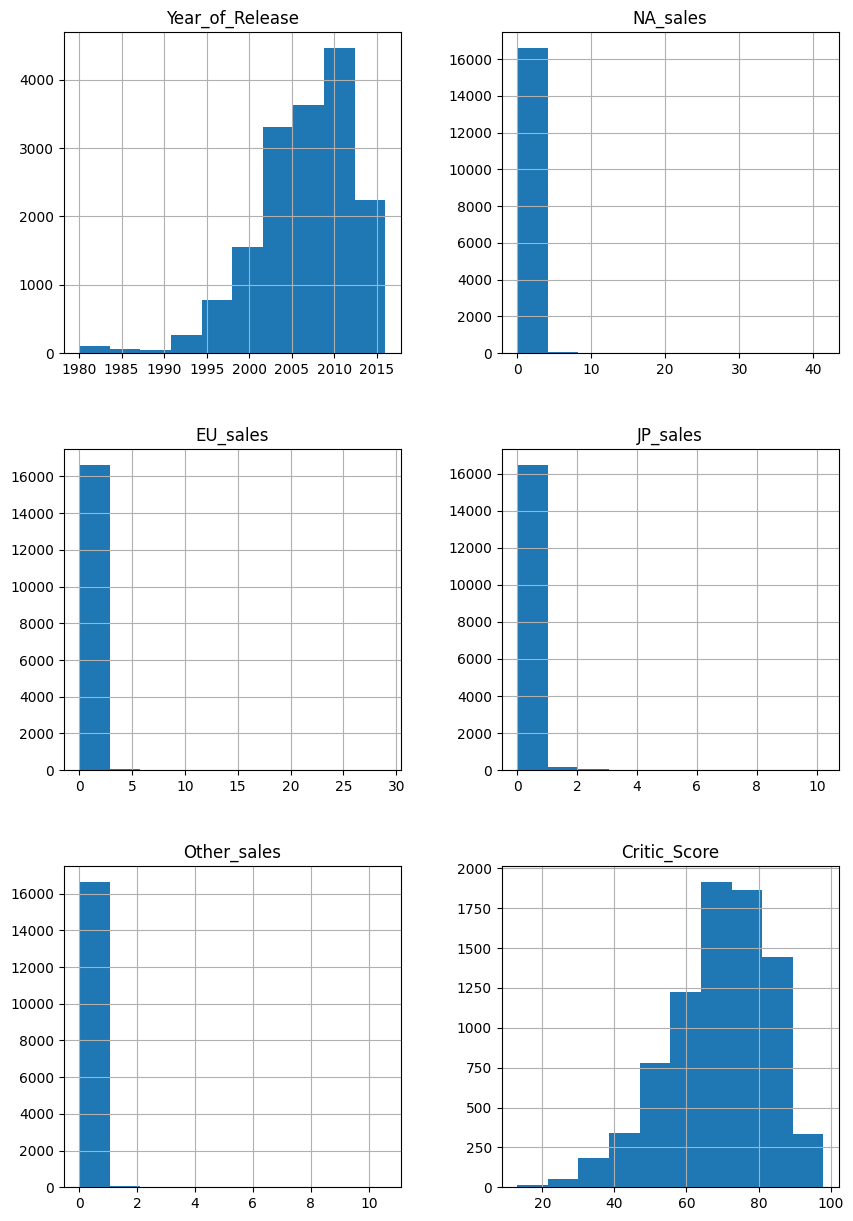

In [14]:
#гистограммы
data.hist(figsize=(10, 15))

### Предобработка данных

In [15]:
#переименование столбцов
data = data.rename(
    columns={
        'Name': 'name',
        'Platform': 'platform',
        'Year_of_Release': 'year_release',
        'Genre': 'genre',
        'NA_sales': 'na_sales',
        'EU_sales': 'eu_sales',
        'JP_sales': 'jp_sales',
        'Other_sales': 'other_sales',
        'Critic_Score': 'critic_score',
        'User_Score': 'user_score',
        'Rating': 'rating'
    }
)

In [16]:
#замена типов данных
data['year_release'] = data['year_release'].astype('Int64')
data['critic_score'] = data['critic_score'].astype('Int64')

Для года выхода игры и оценки критиков по стобальной шкале достаточно иметь целочисленное значение. 

In [17]:
#замена типа данных в оценках пользователей

display('Уникальные значения в столбце оценок пользователей:',data['user_score'].unique())
display(data.loc[data['user_score'] == "tbd"].count())

data['user_score'] = pd.to_numeric(data['user_score'], errors='coerce')

#data['user_score'] = data['user_score'] * 10
#data['user_score'] = data['user_score'].astype('Int64')

'Уникальные значения в столбце оценок пользователей:'

array(['8', nan, '8.3', '8.5', '6.6', '8.4', '8.6', '7.7', '6.3', '7.4',
       '8.2', '9', '7.9', '8.1', '8.7', '7.1', '3.4', '5.3', '4.8', '3.2',
       '8.9', '6.4', '7.8', '7.5', '2.6', '7.2', '9.2', '7', '7.3', '4.3',
       '7.6', '5.7', '5', '9.1', '6.5', 'tbd', '8.8', '6.9', '9.4', '6.8',
       '6.1', '6.7', '5.4', '4', '4.9', '4.5', '9.3', '6.2', '4.2', '6',
       '3.7', '4.1', '5.8', '5.6', '5.5', '4.4', '4.6', '5.9', '3.9',
       '3.1', '2.9', '5.2', '3.3', '4.7', '5.1', '3.5', '2.5', '1.9', '3',
       '2.7', '2.2', '2', '9.5', '2.1', '3.6', '2.8', '1.8', '3.8', '0',
       '1.6', '9.6', '2.4', '1.7', '1.1', '0.3', '1.5', '0.7', '1.2',
       '2.3', '0.5', '1.3', '0.2', '0.6', '1.4', '0.9', '1', '9.7'],
      dtype=object)

name            2424
platform        2424
year_release    2376
genre           2424
na_sales        2424
eu_sales        2424
jp_sales        2424
other_sales     2424
critic_score    1082
user_score      2424
rating          2374
dtype: int64

В столбце user_score (оценка пользователей) присутствует аббревиатура "tbd" - to be determined - с пер. "подлежит уточнению". Таких значений 2424 и по своей сути они являются также пропусками, поэтому при переводе значений в числовой тип мы их принудительном заменим на пропуски.  

In [18]:
#пропуски

print(data.isna().sum())
display(data.query('name.isna()'))

data = data.dropna(subset=['name', 'year_release'])

data['rating'] = data['rating'].fillna('unknown')

name               2
platform           0
year_release     269
genre              2
na_sales           0
eu_sales           0
jp_sales           0
other_sales        0
critic_score    8578
user_score      9125
rating          6766
dtype: int64


,name,platform,year_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
659,NaN,GEN,1993,NaN,1.78,0.53,0.00,0.08,<NA>,NaN,NaN
14244,NaN,GEN,1993,NaN,0.00,0.00,0.03,0.00,<NA>,NaN,NaN


Как оказалось, 2 пропуска в названии игр и жанре были в одних и тех же строках. Поэтому удалим эти пропущенные значения, а также удалим пропуски в столбце года выпуска, их не так много, 269 пропусков.  
Полагаю, что пропущенные значения могли забыть указать, в случае года релиза - возможно, точная дата выхода неизвестна.  
Рейтинг игр (возрастное ограничение) присваивается орг-цией ESRB, самостоятельно пропуски мы заменить не сможем, полагаю, что лучшим решением будет присвоить им "неизвестный" рейтинг. Возможно, данные были утеряны или эти игры не были оценены ESRB.  
Что касается пропусков в оценках критиков и пользователей, то их слишком много, чтобы заменить все значения какой-либо метрикой, что может привести к аномалии, однако и удалять эти значения некорректно. Поэтому пусть пропуски останутся, это тоже достаточно важный показатель.  

In [19]:
#проверка
data.isna().sum()

name               0
platform           0
year_release       0
genre              0
na_sales           0
eu_sales           0
jp_sales           0
other_sales        0
critic_score    8461
user_score      8981
rating             0
dtype: int64

In [20]:
#объединение значений
display(data['rating'].unique())
data['rating'] = data['rating'].replace('K-A', 'E')

array(['E', 'unknown', 'M', 'T', 'E10+', 'K-A', 'AO', 'EC', 'RP'],
      dtype=object)

Было установлено, что ранее рейтинг "E" - everyone назывался по другому: "K-A" - Kids to Adults. Объединим эти значения.

In [21]:
#суммарные продажи
data['total_sales'] = data['na_sales'] + data['eu_sales'] + data['jp_sales'] + data['other_sales']

Создадим отдельный столбец с суммарными продажами во всех регионах.

### Исследовательский анализ данных

year_release
1980       9
1981      46
1982      36
1983      17
1984      14
1985      13
1986      21
1987      16
1988      15
1989      17
1990      16
1991      41
1992      43
1993      60
1994     121
1995     219
1996     263
1997     289
1998     379
1999     338
2000     350
2001     482
2002     829
2003     775
2004     762
2005     939
2006    1006
2007    1197
2008    1427
2009    1426
2010    1255
2011    1136
2012     652
2013     544
2014     581
2015     606
2016     502
Name: year_release, dtype: int64

<AxesSubplot:>

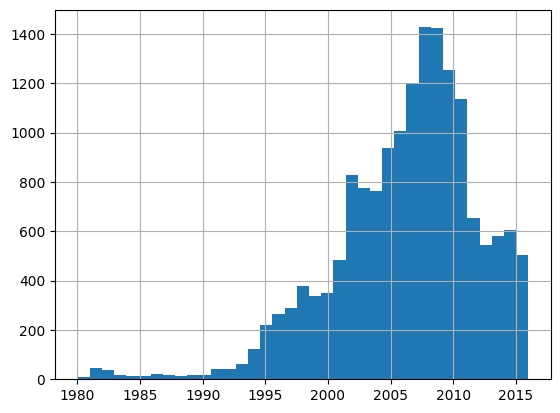

In [39]:
#сколько игр выпускалось в разные годы

display(data.groupby('year_release')['year_release'].count())
data['year_release'].hist(bins=37)

'Кол-во дубликатов названий игр, выпущенных на разных платформах:'

4248

year_release
1980       9
1981      46
1982      36
1983      17
1984      14
1985      14
1986      21
1987      16
1988      15
1989      17
1990      16
1991      40
1992      41
1993      59
1994     117
1995     215
1996     258
1997     282
1998     364
1999     326
2000     325
2001     428
2002     631
2003     546
2004     550
2005     657
2006     773
2007     884
2008    1039
2009    1001
2010     900
2011     779
2012     446
2013     335
2014     319
2015     362
2016     297
Name: year_release, dtype: int64

Text(0, 0.5, 'Количество игр, шт.')

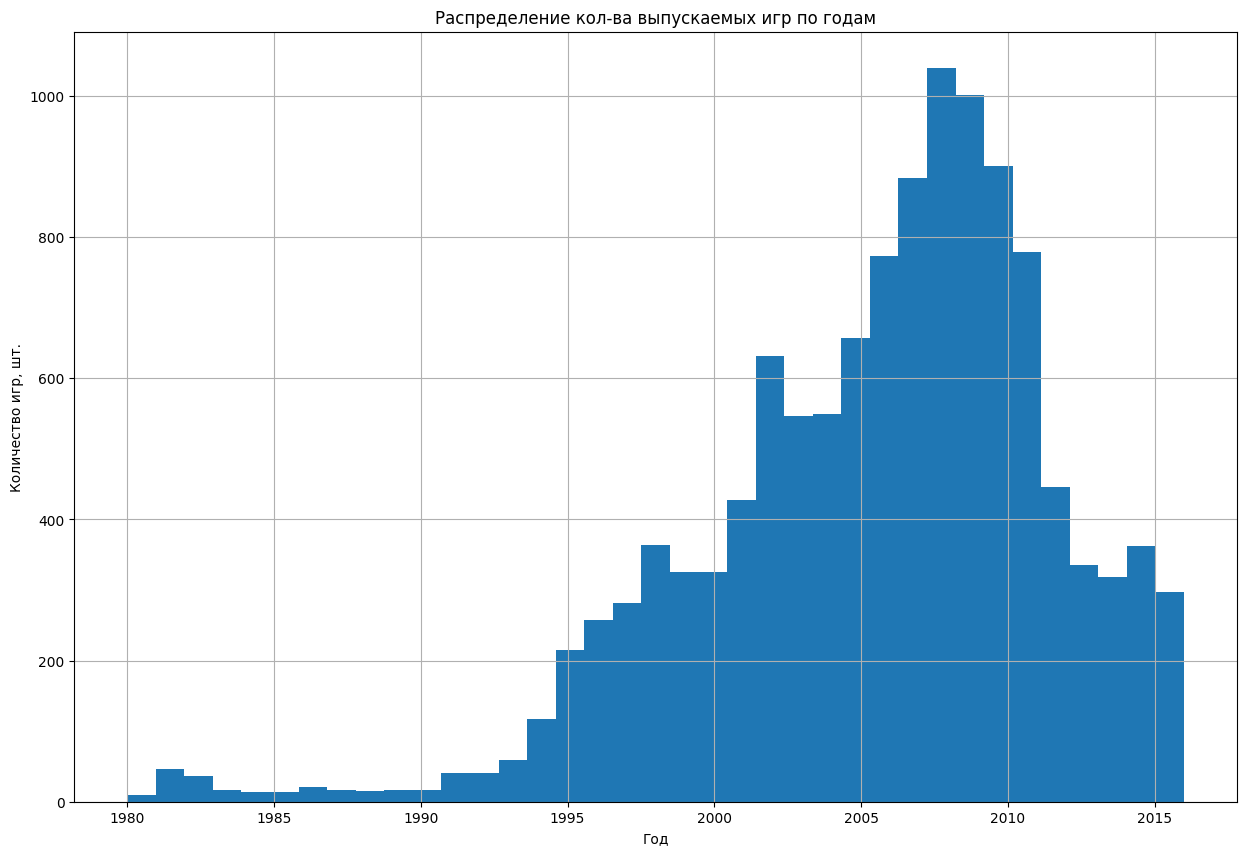

In [23]:
display("Кол-во дубликатов названий игр, выпущенных на разных платформах:",
        data.duplicated(subset=['name', 'year_release']).sum())

data_unique_names = data.drop_duplicates(subset=['name', 'year_release']).reset_index(drop=True)

display(data_unique_names.groupby('year_release')['year_release'].count())
data_unique_names['year_release'].hist(bins=37, figsize=[15, 10])
plt.title('Распределение кол-ва выпускаемых игр по годам')
plt.xlabel('Год')
plt.ylabel('Количество игр, шт.')

Мы посчитали кол-во уникального контента, если игра выходила в один год на несколько платформ, было решено удалить такие дубли, чтобы оценивать распределение по годам более достоверно.  

Мы наблюдаем, что кол-во игр росло с каждым годом, вплоть до 2008-2009 гг. На пике было выпущено более 1000 игр. Однако дальше идет падение в 2010 и 2011 и сильное проседание, начиная с 2012 по 2016, даже если сейчас (в декабре 2016) будут выпущены новые игры, значение не должно сильно увеличиться.  

Полагаю, что для дальнейшего анализа актуальными можно считать данные за последние 5 лет. Примерное выпущенное в этом промежутке кол-во игр от 300 до 400 ежегодно.

In [24]:
#был замечен выброс
data = data.drop(labels=[15957], axis=0)

Было найдено, что игра Strongest Tokyo University Shogi DS была выпущена на DS (Nintendo DS) в 1984г. Однако сама платформа действует с 2004г., поэтому скорее всего тут либо ошибка в годе релиза, либо в указании платформы, самостоятельно в Интернете информации о игре не было обнаружено, поэтому лучше данный выброс удалить, т.к. может искажать данные в дальнейшем.

platform
PS2     1233.56
X360     961.24
PS3      931.82
Wii      891.18
DS       802.76
Name: total_sales, dtype: float64

PS2


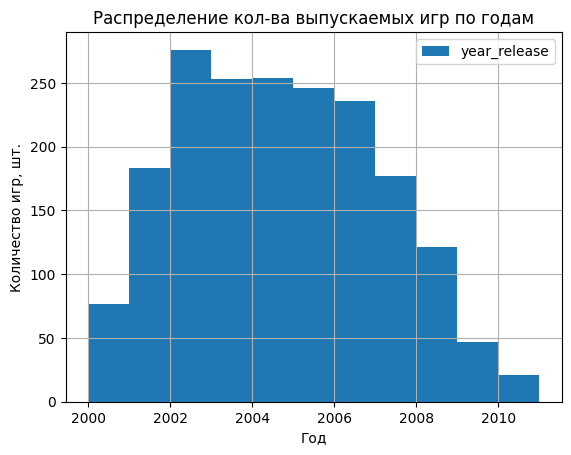

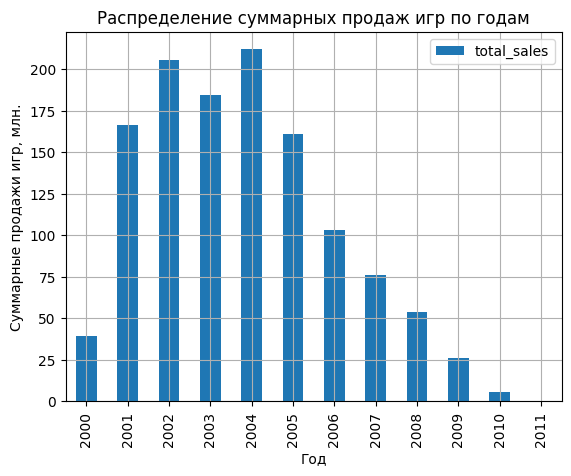

X360


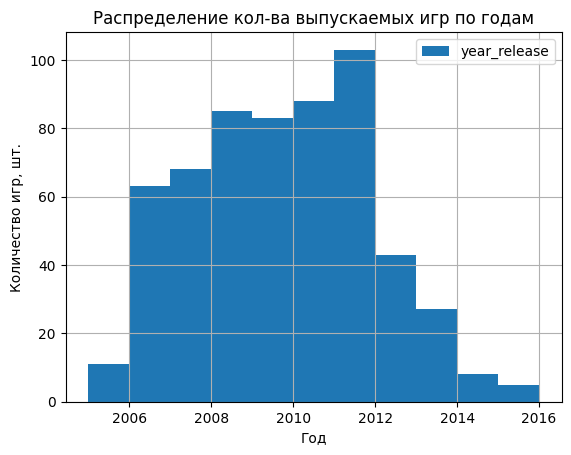

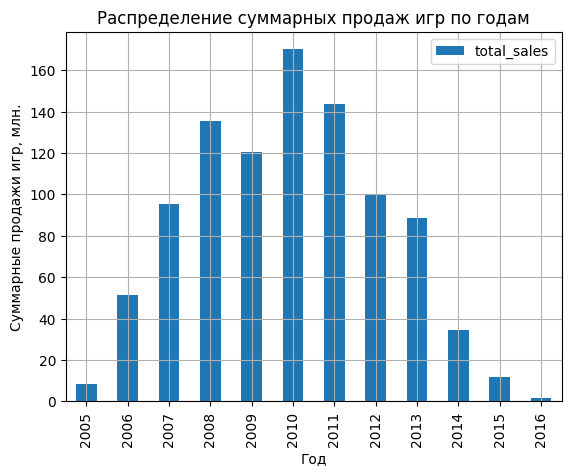

PS3


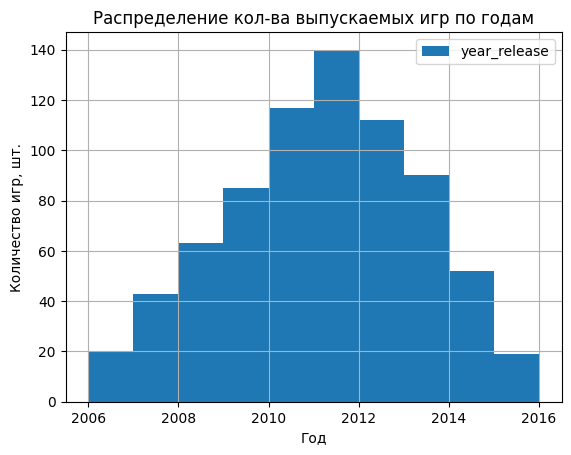

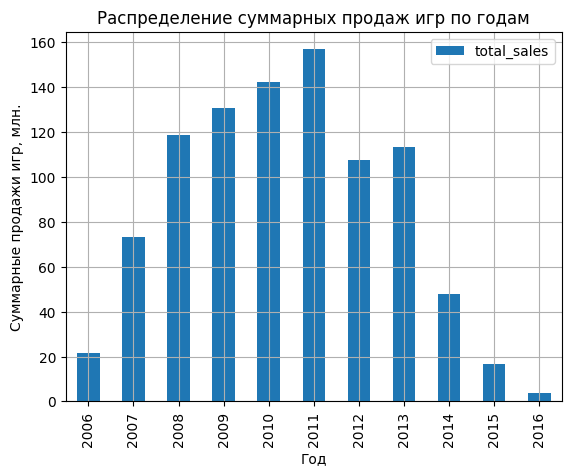

Wii


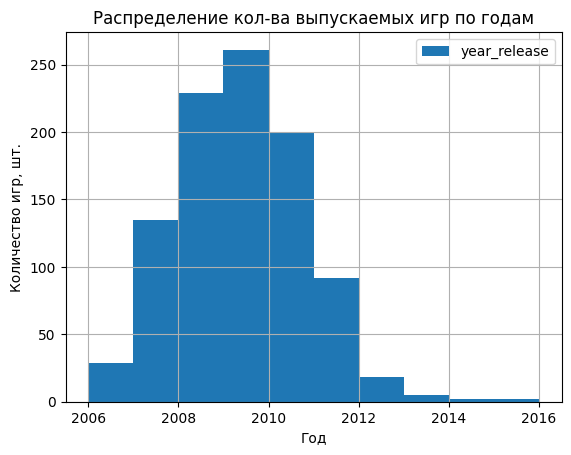

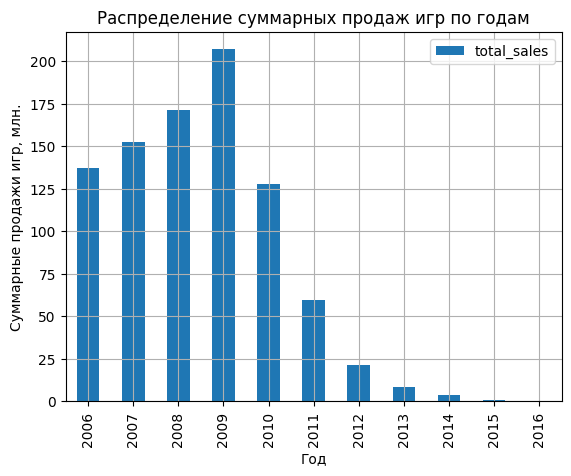

DS


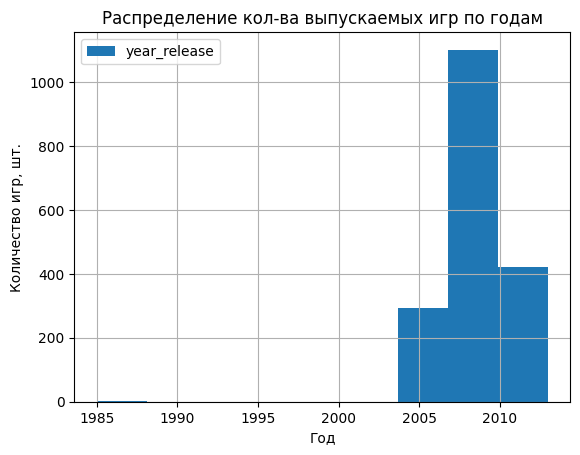

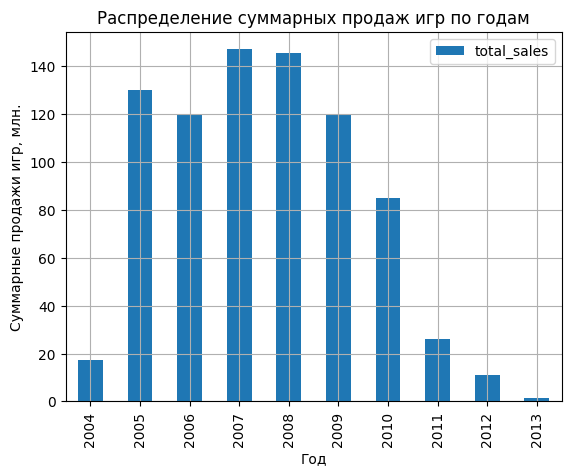

In [25]:
#как менялись продажи по платформам
top_five_platforms = data.groupby('platform')['total_sales'].sum().sort_values(ascending=False).head(5)
display(top_five_platforms)

for i in top_five_platforms.index:
    print(i)
    n_bins = (data.query('platform == @i')['year_release'].max() - 
        data.query('platform == @i')['year_release'].min())
    data_unique_names.query('platform == @i')['year_release'].hist(
        bins=(n_bins), legend=True)
    plt.title('Распределение кол-ва выпускаемых игр по годам')
    plt.xlabel('Год')
    plt.ylabel('Количество игр, шт.')
    plt.show()
    (data.query('platform == @i').pivot_table(index='year_release', values='total_sales', aggfunc='sum')
        .reset_index().plot(x='year_release', y='total_sales', kind='bar', grid=True))
    plt.title('Распределение суммарных продаж игр по годам')
    plt.xlabel('Год')
    plt.ylabel('Суммарные продажи игр, млн.')
    plt.show()

Мы изучили 5 платформ с самыми наибольшими суммарными продажами: PlayStation 2, Xbox 360, PlayStation 3, Wii и Nintendo DS.  
Далее мы отображаем на одном графике их распределение кол-ва выпущенных игр по годам, а на втором суммарные продажи в каждом году. Таким образом мы сможем увидеть различия, вдруг кол-во выпускаемых игр и суммарные продажи будут показывать разное распределение.  

В итоге "жизнь" платформы в среднем длится 10 лет и можно заметить, что в основном их пиковые значения длятся около 5 лет, а далее кол-во выпускаемых игр и суммарные продажи идут на спад.

PS3


<AxesSubplot:xlabel='year_release'>

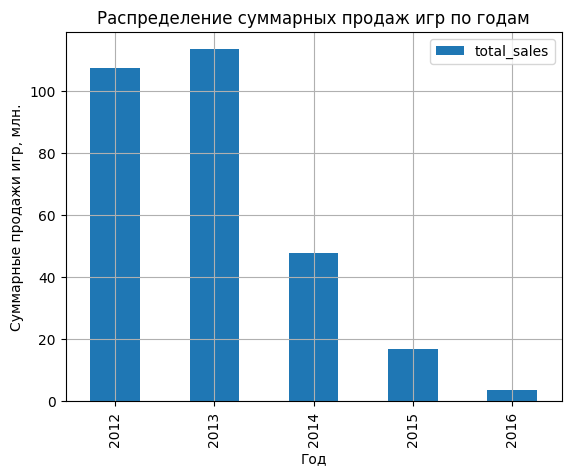

X360


<AxesSubplot:xlabel='year_release'>

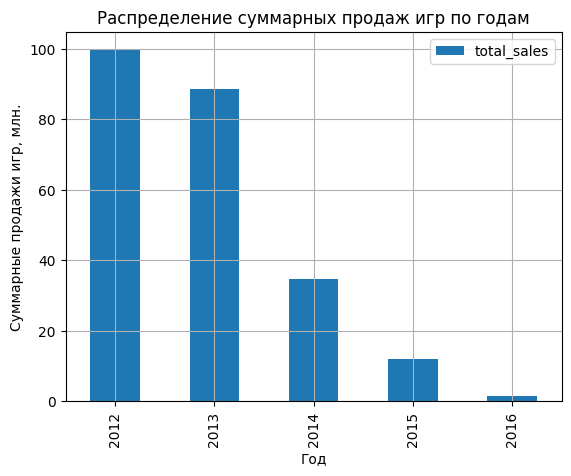

PS4


<AxesSubplot:xlabel='year_release'>

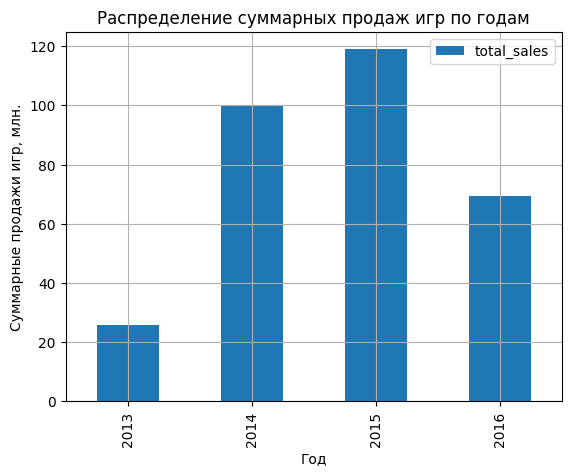

3DS


<AxesSubplot:xlabel='year_release'>

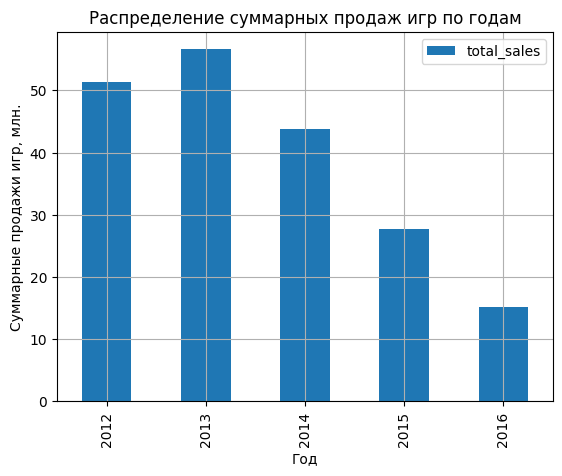

DS


<AxesSubplot:xlabel='year_release'>

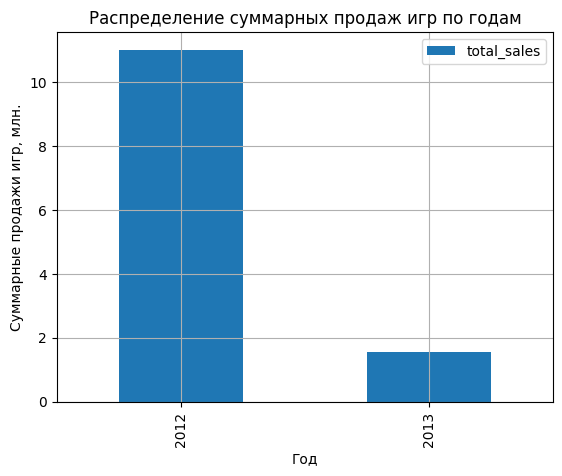

XOne


<AxesSubplot:xlabel='year_release'>

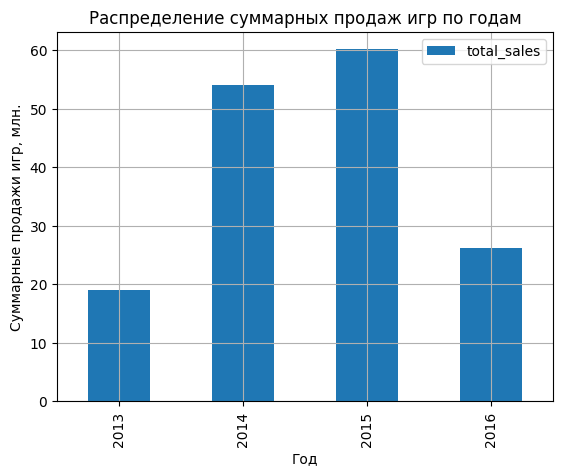

WiiU


<AxesSubplot:xlabel='year_release'>

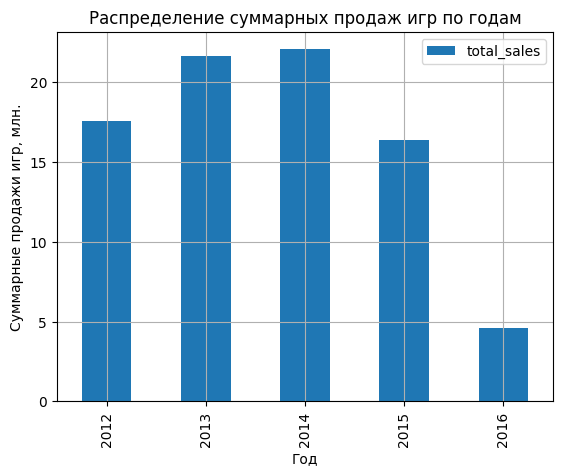

Wii


<AxesSubplot:xlabel='year_release'>

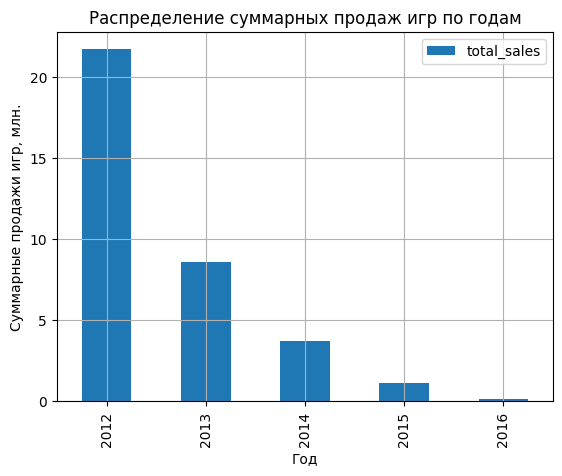

PC


<AxesSubplot:xlabel='year_release'>

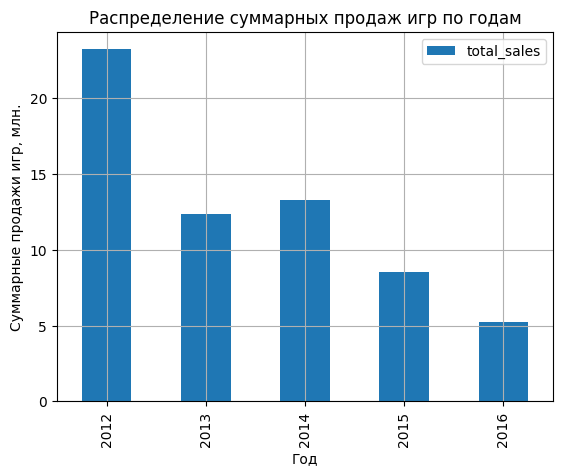

PSV


<AxesSubplot:xlabel='year_release'>

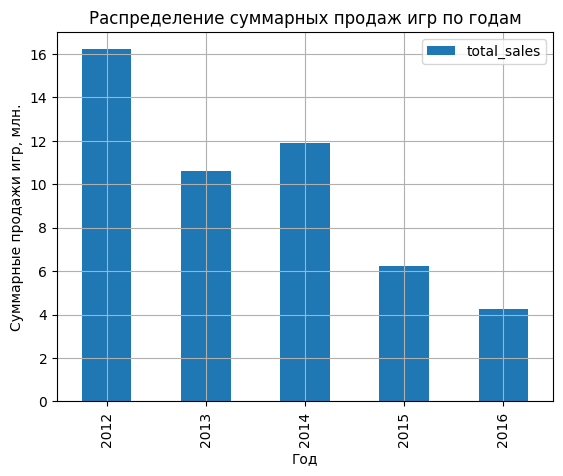

PSP


<AxesSubplot:xlabel='year_release'>

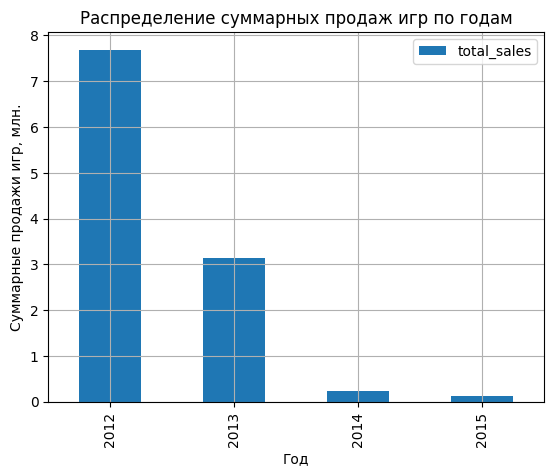

Кол-во проданных копий игр в 2016г:
 platform
PS4     69.25
XOne    26.15
3DS     15.14
PC       5.25
WiiU     4.60
PSV      4.25
PS3      3.60
X360     1.52
Wii      0.18
Name: total_sales, dtype: float64


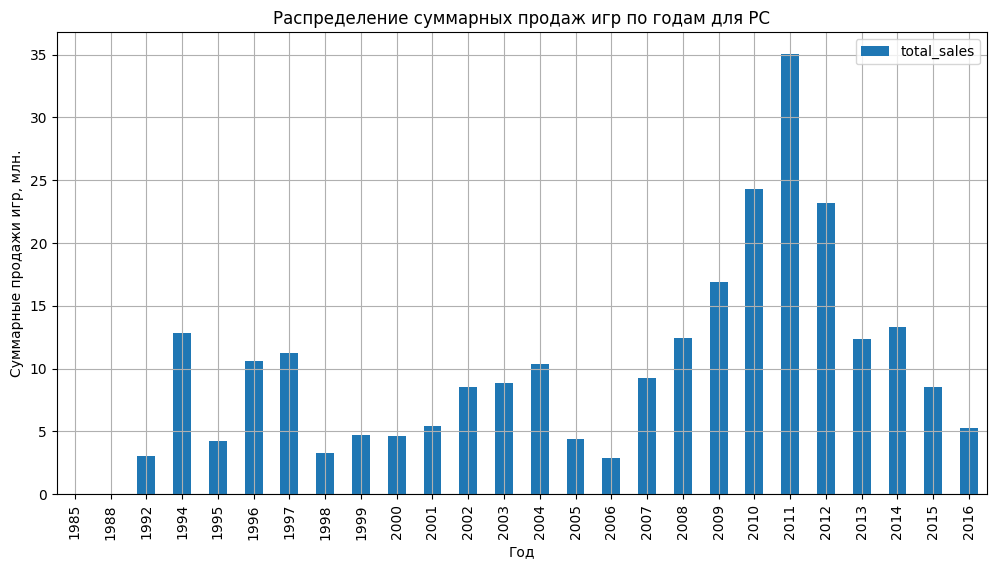

In [26]:
#анализ платформ для актуального периода
data_actual = data.query('year_release >= 2012')

#display(data_actual.groupby('platform')['total_sales'].sum().sort_values(ascending=False))
#data_actual.pivot_table(index=['platform', 'year_release'], values='total_sales', aggfunc='sum')

for i in data_actual['platform'].unique():
    print(i)
    display(data_actual.query('platform == @i').pivot_table(index='year_release', values='total_sales', aggfunc='sum')
        .reset_index().plot(x='year_release', y='total_sales', kind='bar', grid=True))
    plt.title('Распределение суммарных продаж игр по годам')
    plt.xlabel('Год')
    plt.ylabel('Суммарные продажи игр, млн.')
    plt.show()

#посмотрим на продажи в 2016 г.
print('Кол-во проданных копий игр в 2016г:\n',
      data.query('year_release == 2016').groupby('platform')['total_sales'].sum().sort_values(ascending=False))

#посмотрим на продажи игр на ПК за все года
(data.query('platform == "PC"').pivot_table(index='year_release', values='total_sales', aggfunc='sum')
        .reset_index().plot(x='year_release', y='total_sales', kind='bar', grid=True, figsize=[12, 6]))
plt.title('Распределение суммарных продаж игр по годам для PC')
plt.xlabel('Год')
plt.ylabel('Суммарные продажи игр, млн.')
plt.show()


Мы определили все платформы, которые использовались геймерами за последние 5 лет (2012-2016). Для начала мы отсортировали их по кол-ву суммарных продаж игр за этот период, а затем визуализировали распределение продаж игр по годам для каждой платформы. Таким образом, в рамках такого масштаба мы сможем увидеть тенденции к 2016 году. Однако кол-во продаж мы будем смотреть по имеющимся данным за неполный 2016 год, что на мой взгяд, будет более объективно и актуально для игровой индустрии, что позволит составить прогноз на 2017г.  

PS3 и Xbox360 являлись прямыми конкурентами друг другу, но мы видим на графиках, что их пики были в 2012-2013 годах, хотя ранее мы уже замечали, что самые большие продажи были в 2010-2011 годах, что опять же подтверждает правильность выбора актуального периода, взяв меньше период, мы могли не увидеть сильное падение продаж игр на этих платформах. На момент 2016 года PS3 и Xbox360 являются консолями предыдущего поколения, у них сильное падение продаж, поэтому не стоит на них расчитывать в 2017 г.  

Такая же ситуация у Wii, на 2016г. продаж очень мало, на DS (Nintendo DS) продаж нет вообще после 2013г, на PSP игры не выпускают после 2015г.  

Продажи на Wii U резко упали в 2016, что характеризует старение консоли. На PS Vita и Nintendo 3DS падение плавное, что также дает основания считать их устаревающими консолями, однако Nintendo 3DS - третья платформа по кол-ву суммарных продаж за неполный 2016 г., чуть более 15 млн. проданный копий, ее все равно не стоит сбрасывать со счетов, в 2017г. она точно даст продажи, пусть и в меньшем объеме.  

Самый высокий показатель продаж за 2016г. у PS4 - почти 70 млн., на втором месте Xbox One с более 26 млн. проданных копий, но даже они показывают меньший результат, чем в 2015 году. Полагаю, что в 2017г. они также будут лидировать по продажам.  

Отдельно хотелось бы выделить PC - персональный компьютер. Это не консоль, у нее не выходят новые версии, она самосовершенствуется из года в год, когда выходят новые видеокарты, процессоры и пр. комплектующие, поэтому говорить об устаревании платформы невозможно, однако продажи говорят сами за себя, в 2016г. было продано чуть больше 5 млн копий, на консолях в разы продается больше игр, чем на ПК, поэтому про ПК нужно не забывать, но и главного акцента делать не нужно.  


In [27]:
#список потенциально актуальных платформ
list_actual_platform = ['PS4', 'XOne', '3DS', 'PC', 'WiiU', 'PSV']
data_actual = data_actual.query('year_release >= 2013 & platform in @list_actual_platform')

data_actual.pivot_table(index='platform', values='total_sales', aggfunc='sum').sort_values(by='total_sales', ascending=False)

,total_sales
platform,
PS4,314.14
XOne,159.32
3DS,143.25
WiiU,64.63
PC,39.43
PSV,32.99


После проведенного анализа, можно перезаписать созданный датафрейм, оставив только потенциально выгодные платформы и сдвинув актуальный промежуток (2013-2016).

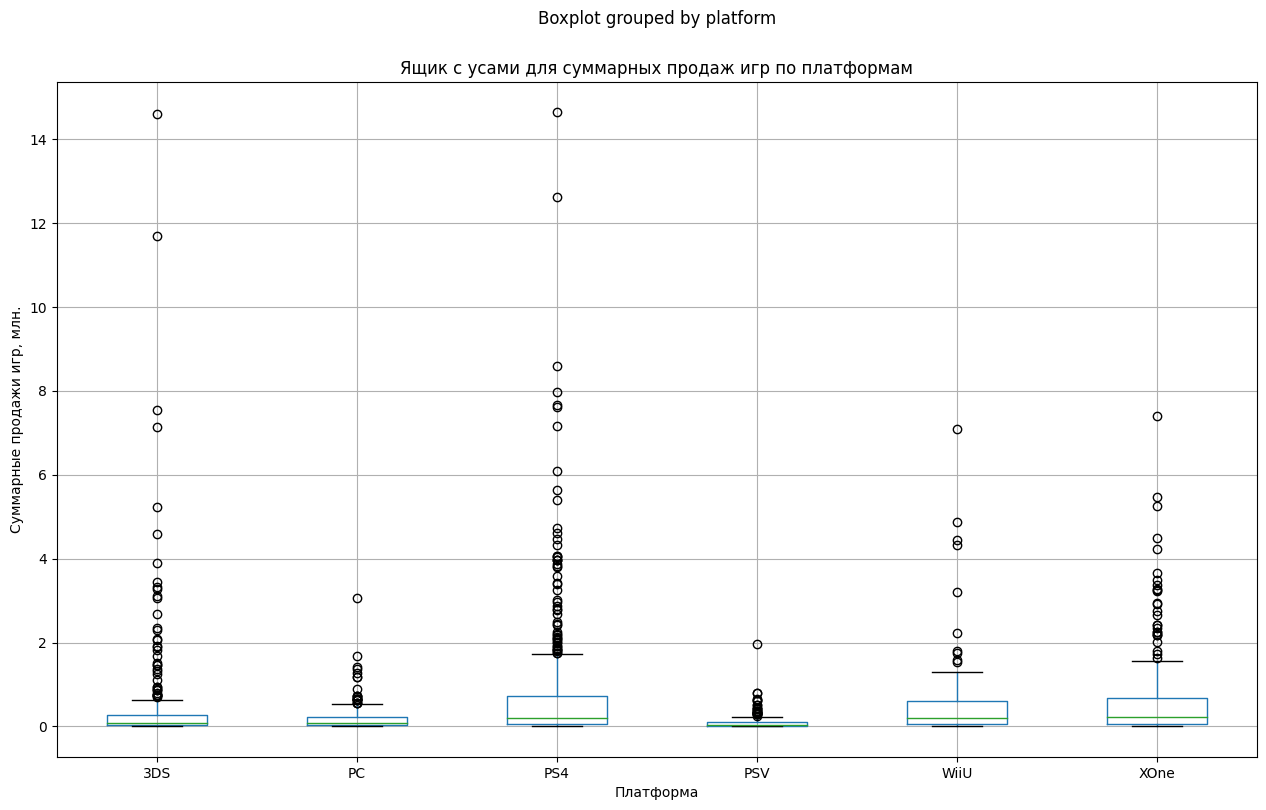

In [28]:
#«ящик с усами» по глобальным продажам игр в разбивке по платформам
data_actual.boxplot(column='total_sales', by='platform', figsize=(15, 9))
plt.title('Ящик с усами для суммарных продаж игр по платформам')
plt.xlabel('Платформа')
plt.ylabel('Суммарные продажи игр, млн.')
plt.show()

Сложно разглядеть сильные различия в медианных значениях глобальных продаж в разбивке по платформам, поскольку в данных присутствуют большие выбросы. Однако эти выбросы - это успешные игры, и таких игр очень мало по сравнению с кол-вом выпускаемых игр.

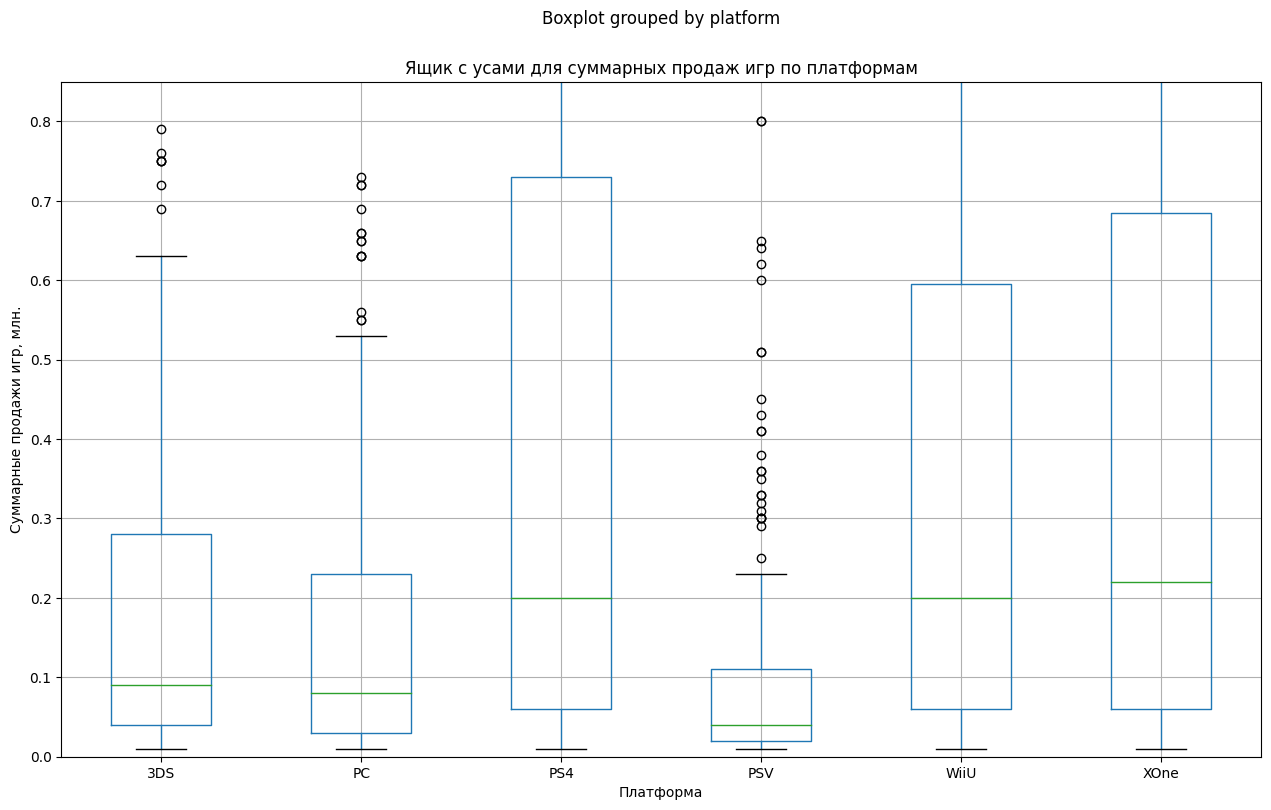

In [29]:
data_actual.boxplot(column='total_sales', by='platform', figsize=(15, 9))
plt.ylim(0, 0.85)
plt.title('Ящик с усами для суммарных продаж игр по платформам')
plt.xlabel('Платформа')
plt.ylabel('Суммарные продажи игр, млн.')
plt.show()

Ограничив кол-во продаж до 0.85 млн., взглянем более детально. Самые большие межквартильные размахи у PS4 и Xbox One, медиана даже немного больше у Xbox One, однако ранее мы видели, что у игр на PS4 почти в 2 раза больше продаж. Получается, что всю эту разницу сделали выбросы - успешные игры, возможно повлияли эксклюзивы, которых на PlayStation больше.  

С чуть меньшим межквартильным размахом, но почти с такой же медианой мы наблюдаем продажи на Wii U. Суммарных продаж, как мы видели ранее, у них в 2.5 раза меньше, чем у Xbox One. Что опять подтверждает, что продажи успешных игр составляют основную часть прибыли.  

Обратная картина у Nintendo DS, не самый большой "ящик с усами", а суммарных продаж, почти как у Xbox One. У PC и PS Vita в целом, наблюдается такой факт, что размеры диаграммы размаха самые небольшие, как и суммарных продаж на этих плафтормах самые низкие.  

Подытоживая, значения медианы, межквартильного размаха и т.п. не дают нам полного понимания глобальной ситуации по продажам на этих платформах.

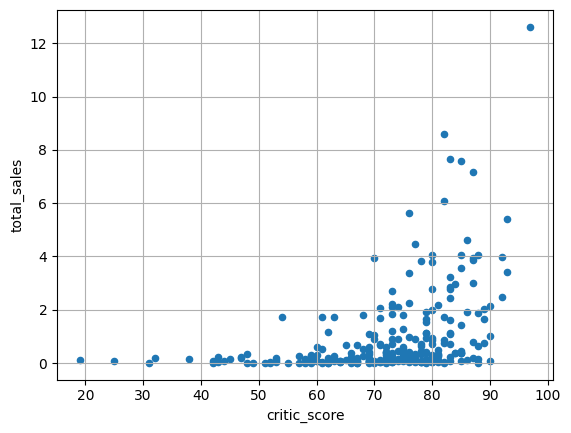

'Корреляция с оценками критиков:'

,total_sales,critic_score
total_sales,1.000000,0.406568
critic_score,0.406568,1.000000


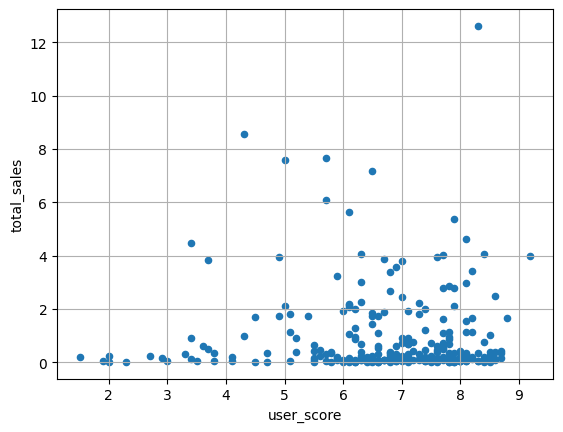

'Корреляция с оценками пользователей:'

,total_sales,user_score
total_sales,1.000000,-0.031957
user_score,-0.031957,1.000000


In [30]:
#корреляция оценок критиков с продажами внутри PS4
data_actual.query('platform == "PS4"').plot(x='critic_score', y='total_sales', kind='scatter', grid=True)
plt.show()
display("Корреляция с оценками критиков:", 
        data_actual.query('platform == "PS4"')[['total_sales', 'critic_score']].corr())

#корреляция оценок пользователей с продажами внутри PS4
data_actual.query('platform == "PS4"').plot(x='user_score', y='total_sales', kind='scatter', grid=True)
plt.show()
display("Корреляция с оценками пользователей:",
        data_actual.query('platform == "PS4"')[['total_sales', 'user_score']].corr())

Для анализа влияния оценок пользователей и критиков на продажи мы взяли самую прибыльную платформу PS4. Согласно графикам и расчетам оценки критиков средне-слабо коррелируют (0.41) с глобальными продажами, а оценки пользователей корреляции с продажами не  имеет (-0.03). Но не будем забывать, что у нас отсутствовала примерно половина значений в обоих столбцах отзывов. Возможно, они смогли бы скорректировать значения корреляции.  

На текущий момент можно сообщить, что критики более объективны в своих оценках, чем пользователи и в то же время заметить, что хорошие оценки не означают, что игра будет хорошо продаваться.

In [31]:
#корреляция оценок критиков и пользователей с продажами на других платформах
for i in ['XOne', '3DS', 'PC', 'WiiU', 'PSV']:
    print(i)
    display(data_actual.query('platform == @i')[['total_sales', 'critic_score']].corr())
    display(data_actual.query('platform == @i')[['total_sales', 'user_score']].corr())

XOne


,total_sales,critic_score
total_sales,1.000000,0.416998
critic_score,0.416998,1.000000


,total_sales,user_score
total_sales,1.000000,-0.068925
user_score,-0.068925,1.000000


3DS


,total_sales,critic_score
total_sales,1.000000,0.357057
critic_score,0.357057,1.000000


,total_sales,user_score
total_sales,1.000000,0.241504
user_score,0.241504,1.000000


PC


,total_sales,critic_score
total_sales,1.00000,0.19603
critic_score,0.19603,1.00000


,total_sales,user_score
total_sales,1.000000,-0.093842
user_score,-0.093842,1.000000


WiiU


,total_sales,critic_score
total_sales,1.000000,0.376415
critic_score,0.376415,1.000000


,total_sales,user_score
total_sales,1.00000,0.41933
user_score,0.41933,1.00000


PSV


,total_sales,critic_score
total_sales,1.000000,0.254742
critic_score,0.254742,1.000000


,total_sales,user_score
total_sales,1.000000,0.000942
user_score,0.000942,1.000000


Как показал анализ влияния оценок на продажи на других платформах, корреляция либо слабая, либо очень слабая. Занимательно, что на Wii U значение корреляции с оценками пользователей выше, чем с оценками критиков.  

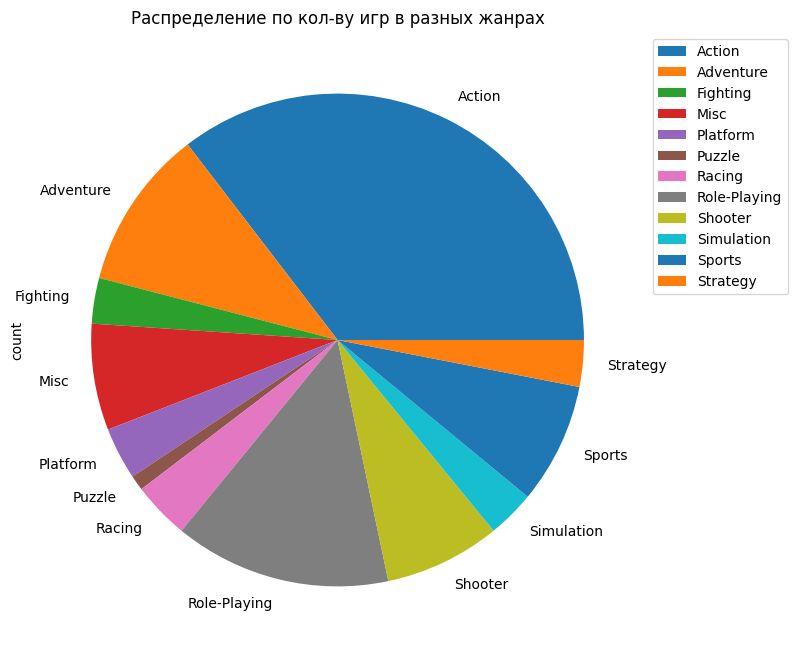

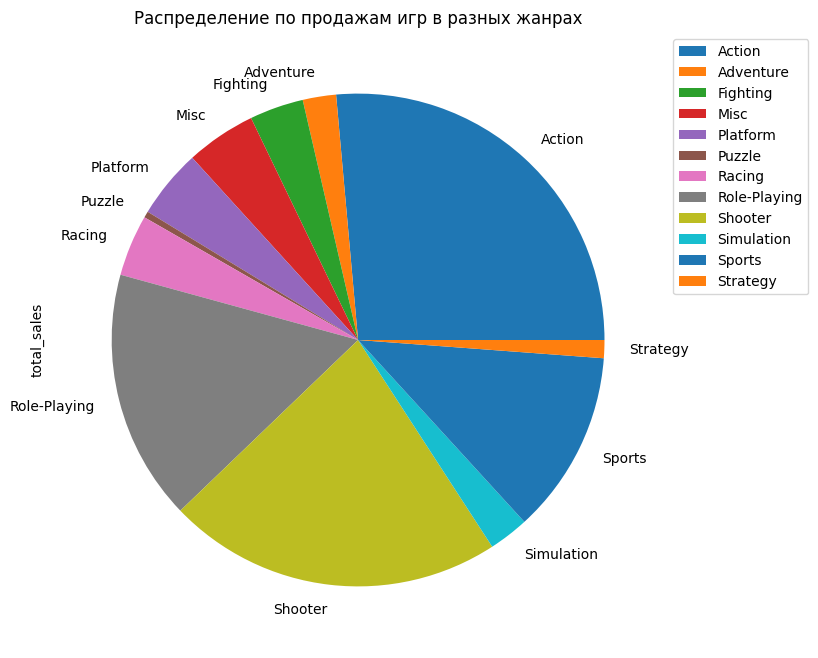

,genre,count,total_sales,mean
8,Shooter,122,165.71,1.358279
10,Sports,127,90.67,0.713937
4,Platform,55,34.22,0.622182
2,Fighting,48,26.69,0.556042
7,Role-Playing,228,123.94,0.543596
6,Racing,60,30.36,0.506000
9,Simulation,50,19.81,0.396200
0,Action,568,199.18,0.350669
3,Misc,112,34.66,0.309464
5,Puzzle,16,3.13,0.195625


In [32]:
#общее распределение игр по жанрам
genre_top = data_actual.pivot_table(index='genre', values='total_sales', aggfunc=['count', 'sum', 'mean'])
genre_top.columns=['count', 'total_sales', 'mean']
#display(genre_top)

genre_top.plot(y='count', kind='pie', figsize=(8, 8), grid=True)
plt.title('Распределение по кол-ву игр в разных жанрах')
plt.legend(bbox_to_anchor=(1,1), loc="upper left")
plt.show()

genre_top.plot(y='total_sales', kind='pie', figsize=(8, 8))
plt.title('Распределение по продажам игр в разных жанрах')
plt.legend(bbox_to_anchor=(1,1), loc="upper left")
plt.show()

genre_top.reset_index().sort_values(by='mean', ascending=False)

Action - безусловный лидер по кол-ву выпущенных игр в этом жанре (568), на втором месте Role-Playing, в нем почти в 2.5 раза меньше выпущенных игр (228), а на третьем Adventure - 169 игр.  

Суммарных продаж также больше всех у Action - почти 200 млн. проданных копий игр. У второго и третьего места отрыв не такой большой, как по кол-ву выпущенных игр, в жанре Shooter продано 165.7 млн. игр, а в жанре Role-Playing почти 124 млн.  

Интереснее было выяснить, какие жанры самые прибыльные в пересчете, сколько в среднем раз купят одну выпущенную игру. И лидером стал жанр Shooter - 1.36 млн. копий одной игры продается в среднем. Далее идет Sports - 0.71 млн., а потом Platform с 0.62 млн. А жанр Action, ранее лидирующий по кол-ву игр и по кол-ву продаж имеет лишь 0.35 млн. проданных копий одной игры в среднем. Хуже всех дела в жанре Adventure - лишь 0.1 млн. в среднем продается с одной игры.  

Хотелось бы отметить, что часто бывает такое, что жанров у игры прописывается несколько. Чаще всего собственно Shooter является одним из игровых элементов, а сама игра принадлежит к жанру Action, Adventure, Platform или RPG. Так, что необходимо это учитывать.

### Портрет пользователя каждого региона

In [33]:
#Самые популярные платформы

#Северная Америка
display('Рейтинг платформ в Северной Америке:', 
        data_actual.groupby('platform')['na_sales'].sum().sort_values(ascending=False))

#Европа
display('Рейтинг платформ в Европе:', 
        data_actual.groupby('platform')['eu_sales'].sum().sort_values(ascending=False))

#Япония
display('Рейтинг платформ в Японии:', 
        data_actual.groupby('platform')['jp_sales'].sum().sort_values(ascending=False))

'Рейтинг платформ в Северной Америке:'

platform
PS4     108.74
XOne     93.12
3DS      38.20
WiiU     29.21
PC       11.11
PSV       5.04
Name: na_sales, dtype: float64

'Рейтинг платформ в Европе:'

platform
PS4     141.09
XOne     51.59
3DS      30.96
PC       25.36
WiiU     19.85
PSV       6.10
Name: eu_sales, dtype: float64

'Рейтинг платформ в Японии:'

platform
3DS     67.81
PSV     18.59
PS4     15.96
WiiU    10.88
XOne     0.34
PC       0.00
Name: jp_sales, dtype: float64

Т.к. в анализе мы исследуем 6 потенциально прибыльных платформ, думаю, лучше будет изучить все 6 платформ на популярность, не прибегая к сокращению до топ-5.  

Для Северной Америки самой популярной платформой является PS4, далее с небольшим отставанием Xbox One. Значительно уступают портативная консоль Nintendo 3DS и консоль Wii U.На 5-м месте PC, а последнее 6-е место занимает PS Vita.   

В Европе лидером с существенным опережением от других платформ является PS4. Почти в 3 раза реже пользуются Xbox One, потом идет Nintendo 3DS. На PC играют в Европе чаще, чем в Северной Америке, а Wii U, наоборот, пользуется меньшей популярностью. Однако, как и в Северной Америке самой непопулярной платформой является PS Vita.  

Япония поддерживает местных производителей Nintendo и Sony. Nintendo 3DS - самая популярная платформа для игр. При этом, надо отметить, что японцы больше предпочитают портативные консоли, ведь на втором месте у них PS Vita от компании Sony. В Европе и Северной Америке эта консоль была абсолютно непопулярна. С небольшим разрывом на 3-м и 4-м местах PS4 и Wii U. Xbox One от американской компании Microsoft на пятом месте с очень маленькими продажами, а согласно данным, в Японии никто не пользуется компьютерами для игр, ведь PC в этом регионе совершенно не имеет продаж.

In [34]:
#Самые популярные жанры (топ-5)

#Северная Америка
display('Топ-5 жанров в Северной Америке:', 
        data_actual.groupby('genre')['na_sales'].sum().sort_values(ascending=False).head())

#Европа
display('Топ-5 жанров в Европе:', 
        data_actual.groupby('genre')['eu_sales'].sum().sort_values(ascending=False).head())

#Япония
display('Топ-5 жанров в Японии:', 
        data_actual.groupby('genre')['jp_sales'].sum().sort_values(ascending=False).head())

'Топ-5 жанров в Северной Америке:'

genre
Shooter         75.37
Action          73.43
Role-Playing    37.92
Sports          37.09
Platform        14.18
Name: na_sales, dtype: float64

'Топ-5 жанров в Европе:'

genre
Action          73.96
Shooter         64.89
Sports          38.63
Role-Playing    32.00
Racing          15.18
Name: eu_sales, dtype: float64

'Топ-5 жанров в Японии:'

genre
Role-Playing    44.84
Action          29.87
Misc             8.27
Fighting         5.33
Platform         4.75
Name: jp_sales, dtype: float64

В Северной Америке можно сказать 2 самых популярных жанра - это Shooter и Action. Они занимают 1 и 2 места, а разница между ними невелика. 3 и 4 места также находятся примерно на одном уровне друг с другом, это соответственно, Role-Playing и Sports. Замыкает топ-5 жанр Platform.  

Action стал самым популярным жанром в Европе, Shooter немного отстал и занял 2-е место. Далее с отрывом на 3-м месте Sports, на 4-м Role-Playing. Получается, что те же жанры, что и в Северной Америке находятся в топ-4, только места немного поменялись. А вот на 5-м месте отличие, в Европе это жанр Racing.  

Для Японии самый популярный жанр это Role-Playing, потом идет Action. Далее на 3-м месте Misc(Разное). Fighting на 4-м месте, а замыкает топ-5 Platform.  

Ранее мы уже подмечали, что жанров у игры может быть несколько. Также, хотелось бы отметить, что жанр Action может сам разделяться на поджанры. Поэтому можно считать Action самым популярным жанром в мире. А мы можем выделить некоторые культурные особенности, например, жители Северной Америки и Европы более предпочитают "экшн-стрелялки", а японцам больше нравится "Role-Playing", где необходимо развивать вымышленного персонажа.

In [35]:
#Какие имеются рейтинги ESRB
data_actual.groupby('rating')['rating'].count()

rating
E          206
E10+       178
M          255
T          238
unknown    727
Name: rating, dtype: int64

У почти половины игр неизвестен рейтинг ESRB. Поэтому все дальнейшие выводы будут с оговоркой, что у нас неполные данные. Неизвестно, как бы изменились значения, если бы изначально не было пропусков.

In [36]:
#Влияние рейтинга ESRB на продажи

#Северная Америка
display('Влияние рейтинга ESRB на продажи в Северной Америке:', 
        data_actual.groupby('rating')['na_sales'].sum().sort_values(ascending=False))

#Европа
display('Влияние рейтинга ESRB на продажи в Европе:', 
        data_actual.groupby('rating')['eu_sales'].sum().sort_values(ascending=False))

#Япония
display('Влияние рейтинга ESRB на продажи в Японии:', 
        data_actual.groupby('rating')['jp_sales'].sum().sort_values(ascending=False))

'Влияние рейтинга ESRB на продажи в Северной Америке:'

rating
M          97.05
unknown    68.68
E          52.37
T          35.07
E10+       32.25
Name: na_sales, dtype: float64

'Влияние рейтинга ESRB на продажи в Европе:'

rating
M          94.51
unknown    63.54
E          58.00
T          32.60
E10+       26.30
Name: eu_sales, dtype: float64

'Влияние рейтинга ESRB на продажи в Японии:'

rating
unknown    72.97
T          13.52
E          13.26
M           8.17
E10+        5.66
Name: jp_sales, dtype: float64

Можно заметить, что продажи игр в Северной Америке и Европе в зависимости от рейтинга ESRB распределись почти одинаково.  
«M» («Mature») — «Для взрослых» - игры с таким знаком рейтинга стали самыми продаваемыми в обоих регионах. Тут можно выделить закономерность с самыми популярными жанрами Action/Shooter, где может часто присутствовать насилие, кровь, сексуальные сцены или  ненормативная лексика.  
«E» («Everyone») — «Для всех» на втором месте, потом «T» («Teen») — «Подросткам»: игры подходит для лиц от 13 лет. И завершает топ для Европы и Северной Америки «E10+» («Everyone 10 and older») — «Для всех от 10 лет и старше».  

Игры, чаще всего продающиеся в Японии, не имеют рейтинга. Поэтому тут некорректно сравнивать оставшиеся значения,слишком уж большая доля игр без рейтинга. В связи с такой аномалией, можно предположить, что в Японии имеется своя рейтинговая организация, наподобии ESRB, все-таки это компания из Северной Америки, а мы видели даже в распределении платформ, что японцы поддерживают местного производителя. 

### Проверка гипотез

#### Гипотеза: Средние пользовательские рейтинги платформ Xbox One и PC одинаковые

Нулевая гипотеза: Средние пользовательские рейтинги платформ Xbox One и PC одинаковые.  
Альтернативная гипотеза: Средние пользовательские рейтинги платформ Xbox One и PC разные.

In [37]:
sample_1 = data_actual.query('platform=="XOne" & ~user_score.isna()')['user_score']
sample_2 = data_actual.query('platform=="PC" & ~user_score.isna()')['user_score']

#print(sample_1.mean())
#print(sample_2.mean())

alpha = 0.05

results = st.ttest_ind(
    sample_1, 
    sample_2,
    equal_var=False
)

print('p-значение:', results.pvalue)

if results.pvalue < alpha:
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

p-значение: 0.14759594013430463
Не получилось отвергнуть нулевую гипотезу


P-значение показывает, что вероятность случайно получить такое или большее различие равно почти 15%.  
Это слишком большая вероятность, чтобы сделать вывод о том, что средние пользовательские рейтинги разные.  

#### Гипотеза: Средние пользовательские рейтинги жанров Action и Sports разные

Нулевая гипотеза: Средние пользовательские рейтинги жанров Action и Sports одинаковые.  
Альтернативная гипотеза: Средние пользовательские рейтинги жанров Action и Sports разные.

In [38]:
sample_1 = data_actual.query('genre=="Action" & ~user_score.isna()')['user_score']
sample_2 = data_actual.query('genre=="Sports" & ~user_score.isna()')['user_score']

#print(sample_1.mean())
#print(sample_2.mean())

alpha = 0.05

results = st.ttest_ind(
    sample_1, 
    sample_2,
    equal_var=False
)

print('p-значение:', results.pvalue)

if results.pvalue < alpha:
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

p-значение: 1.2678091455806196e-11
Отвергаем нулевую гипотезу


P-значение сильно меньше выбранного критического уровня статистической значимости. Даже, если мы определили уровень = 0.01, p-значение было бы меньше. Отвергнув нулевую гипотезу, мы делаем вывод, что средние пользовательские рейтинги жанров Action и Sports все-таки разные.

### Общий вывод

Наше исследование было выполнено для интернет-магазине «Стримчик», который продаёт по всему миру компьютерные игры. В нашем распоряжении были исторические данные до декабря 2016 г. о продажах игр, оценки пользователей и экспертов, жанры и платформы. Перед нами была поставлена задача выявить определяющие успешность игры закономерности, чтобы в дальнейшем сделать ставку на потенциально популярный продукт и спланировать рекламные кампании.  

Для этого мы выделили несколько пунктов для анализа:
  - Распределение кол-ва выпускаемых игр по годам
  - Исследование продаж игр по платформам
  - Исследование тенденций прибыльности платформ к 2017 году
  - Построение диаграммы размаха по глобальным продажам игр в разбивке по платформам
  - Влияние отзывов пользователей и критиков на продажи игр
  - Распределение игр по жанрам и анализ их прибыльности
  
Также мы составили портреты пользователей каждого региона и определили:
  - Самые популярные платформы
  - Самые популярные жанры
  - Влияние рейтинга ESRB на продажи игр
  
Далее были проверены 2 гипотезы:
  - Средние пользовательские рейтинги платформ Xbox One и PC одинаковые
  - Средние пользовательские рейтинги жанров Action и Sports разные
  
**Распределение кол-ва выпускаемых игр по годам**  

Был достигнут пик кол-ва выпускаемых игр в 2008 г. и 2009 г. Тогда выпускалось более 1000 игр ежегодно. Далее кол-во выпускаемых игр с каждым годом уменьшалось. За последние 5 лет, начиная с 2012 года, значение ежегодно выпускаемых игр находится в промежутке от 300 до 400 игр.  

**Исследование продаж игр по платформам**  

За всю историю было определено 5 платформ с наибольшими суммарными продажами игр: PlayStation 2, Xbox 360, PlayStation 3, Wii и Nintendo DS. Исследование их распределения продаж по годам привело нас к закономерности, что "жизнь" платформы длится около 10 лет, при этом свои пиковые значения продаж игр платформа показывает в течении 5 лет, а далее неминуемо продажи идут на спад.

**Исследование тенденций прибыльности платформ к 2017 году**  

Было проанализировано распределение продаж игр по платформам за последние 5 лет. Благодаря этому, мы смогли выделить несколько потенциально прибыльных платформ:
  - *PlayStation 4* - абсолютно лидирующая платформа по продажам игр на ней. Она появилась в 2013 г., и с 2014 г. находится на своем пике. Предполагается, что в течении 2017 г. данная консоль будет находиться на пике и удерживать лидерство.  
  - *Xbox One* - конкурент PlayStation 4, платформа также появилась в 2013 г., однако уступает PlayStation 4 по глобальным продажам игр практически в 2 раза. Также предполагается, что эта консоль будет находиться на пике, но вряд ли обгонит своего конкурента.
  - *Nintendo 3DS* - ранее прибыльная платформа. Сейчас находится на плавном спаде после пика , однако за 2016 г. стала 3-й платформой по продажам игр на ней. Полагаем, что в 2017 г. суммарное кол-во продаж игр на ней снизится в несколько раз, однако определенную прибыль данная консоль должна принести.  
  - *Wii U* - платформа, у которой прошел пик продаж. Как и у Nintendo 3DS полагаем, что в 2017 г. суммарное кол-во продаж игр на ней снизится, однако прибыль данная консоль еще может принести.
  - *PC* - персональные компьютеры. Поскольку эта платформа единственная является неустаревающей, то продажи игр на ней будут зависеть от кол-ва и качества самих выпускаемых игр. Полагается, что в 2017 г. продажи останутся на том же уровне.  
  - *PlayStation Vita* - портативная консоль. Из представленной шестерки показала наименьшие продажи, находится на плавном спаде. Скорее всего, на небольшую прибыль в 2017 г. можно рассчитывать.  
  
Остальные платформы, показывавшие продажи с 2012 г., было решено не включать в дальнейшее исследование, т.к. на 2016 г. они либо не имеют продаж игр, либо находятся на сильном спаде и игры продаются в незначительном кол-ве. Также начало актуального периода было сдвинуто на 2013 г., т.к. обе топовые платформы PlayStation 4 и Xbox One появились в этом году.  

**Построение диаграммы размаха по глобальным продажам игр в разбивке по платформам**  

Была построена диаграмма размаха по глобальным продажам игр в разбивке по выбранным платформам. Это позволило нам сделать вывод, что самые высокие значения третьих квартилей Q3 и верхней границы "уса" имеют соответственно платформы PlayStation 4, Xbox One и Wii U.  

Необходимо отметить, что размер "ящика с усами" не гарантирует высоких результатов по суммарным продажам. Существенное влияние на суммарные продажы игр оказывают выбросы, которые были замечены на графике. Эти выбросы также называют хитами, играми, которые "выстрелили". Поэтому рекомендуется в поиске потенциально успешного продукта нацелиться на качество игры, а не на их количество.  

**Влияние отзывов пользователей и критиков на продажи игр**  

Была построена диаграмма рассеяния и посчитана корреляция между отзывами и продажами. Сначала была рассмотрена самая популярная платформа PlayStation 4, корреляция между продажами и отзывами критиков была слабой, а оценки пользователей практически не влияют на продажи игр. Однако, необходимо отметить, что мы имели пропуски в исзодных данных, что могло бы в дальнейшем изменить результаты исследования.  

Для других платформ корреляция между отзывами и продажами была либо слабой, либо очень слабой.

**Распределение игр по жанрам и анализ их прибыльности**  

В жанре Action больше всего выпускают игр, этот же жанр имеет самые высокие суммарные продажи. Выделяется также жанр с наименьшим кол-вом выпускаемых игр и самыми низкими суммарными продажами - Puzzle.  

Для анализа прибыльности игр в зависимости от жанра было принято решение считать среднее значение проданных копий игр для каждого жанра.  

Жанр | Кол-во выпущенных игр | Кол-во продаж игр | Среднее значение 
:--- | :--- |:--- | :--- 
Shooter | 122 | 165.71 | 1.358279
Sports | 127 | 90.67 | 0.713937
Platform | 55 | 34.22 | 0.622182
Fighting | 48 | 26.69 | 0.556042
Role-Playing | 228 | 123.94 | 0.543596
Racing | 60 | 30.36 | 0.506000
Simulation | 50 | 19.81 | 0.396200
Action | 568 | 199.18 | 0.350669
Misc | 112 | 34.66 | 0.309464
Puzzle | 16 | 3.13 | 0.195625
Strategy | 49 | 8.91 | 0.181837
Adventure | 169 | 16.48 | 0.097515

Вышеуказанное позволило нам сделать вывод, что самым прибыльном жанром является Shooter, в среднем с одной игры продается 1.36 млн. копий. Самым неприбыльном жанром является Adventure, где в среднем с одной игры продается менее 100 тыс. копий.  

**Самые популярные платформы для каждого региона**  

Проанализированные нами данные позволили установить, что портреты пользователей Европы и Северной Америки во многом похожи. Однако выделим отличия, платформа PlayStation 4 является для европейцев абсолютном лидером, а для жителей Северной Америки она лишь немного опережает Xbox One, находящийся на втором месте по популярности. На 3-м месте и там, и там Nintendo 3DS. В Северной Америке консоль Wii U на 4-м месте, а PC на 5-м, в Европе же с точностью до наоборот. Замыкает в обоих регионах консоль PlayStation Vita.  

В Японии самой популярной платформой с большим отрывом является Nintendo 3DS, далее PlayStation Vita, PlayStation 4 и Wii U. Xbox One в данном регионе имеет незначительные продажи, и как показывают результаты, на PC продаж совсем нет. Это позволило нам выявить закономерность, что японские пользователи предпочитают платформы от местных производителей Sony и Nintendo.

**Самые популярные жанры для каждого региона**  

Для каждого региона был сформирован топ-5 популярных жанров. Пользователи Европы и Северной Америки оказались схожи в своих жанровых предпочтениях. Первые два места занимают жанры Action/Shooter, а на 3-м и 4-м месте Role-Playing и Sports. В Северной Америке замыкает топ-5 жанр Platform, а в Европе Racing.  

В Японии самым популярном жанром стал Role-Playing, далее Action. 3-е место у Misc(Разное), потом Fighting и замыкает топ-5 Platform.  

**Влияние рейтинга ESRB на продажи игр для каждого региона**  

Исходные данные были неполны, поэтому текущий анализ может быть искажен. Особенно это сказалось на пользователях из Японии, по подавляющему большинству продаж игр в регионе мы не имели сведений о рейтинге ESRB. В связи с этим, рекомендуется либо обновить данные по рейтингу ESRB, либо для Японии взять данные по другому возрастному цензору, например, Computer Entertainment Rating Organization (CERO).   

Пользователи Европы и Северной Америки оказались опять схожи в своем распределении по рейтингу. «M» («Mature») — «Для взрослых» - игры с таким знаком рейтинга стали самыми продаваемыми в обоих регионах. «E» («Everyone») — «Для всех» на втором месте, потом «T» («Teen») — «Подросткам»: игры подходит для лиц от 13 лет. И завершает топ для Европы и Северной Америки «E10+» («Everyone 10 and older») — «Для всех от 10 лет и старше». Однако, тут также рекомендуется обновить данные по рейтингу и повторно провести исследование.  

**Гипотеза: Средние пользовательские рейтинги платформ Xbox One и PC одинаковые**  

Была сформирована нулевая гипотеза: Средние пользовательские рейтинги платформ Xbox One и PC одинаковые.  
Альтернативная гипотеза: Средние пользовательские рейтинги платформ Xbox One и PC разные.  
Был проведен t-test, в итоге было получено p-значение, примерно равное 0.15, что превышало критический уровень статистической значимости = 0.05. В следствии этого, у нас не получилось отвергнуть нулевую гипотезу.  

**Гипотеза: Средние пользовательские рейтинги жанров Action и Sports разные**  

Была сформирована нулевая гипотеза: Средние пользовательские рейтинги жанров Action и Sports одинаковые.  
Альтернативная гипотеза: Средние пользовательские рейтинги жанров Action и Sports разные.  
Был проведен t-test, в итоге было получено p-значение, которое было меньше критического уровня статистической значимости = 0.05. В следствии этого, мы отвергли нулевую гипотезу и приняли альтернативную.  

**Итоги и общие рекомендации**  
  
Для планирования рекламной кампании на 2017 г. рекомендуется сделать ставку на платформу PlayStation 4, согласно исследованию, данная консоль будет лидировать для всех трех регионов. Также, необходимо отметить платформу Xbox One, прогнозируется, что она будет второй консолью по продажам игр на ней для Северной Америки и Европы, но не стоит брать ее в расчет для рынка Японии.  
    
Для Северной Америки и Европы ожидается, что лидерами жанров станут Action/Shooter, также можно добавить жанры Role-Playing и Sports, но акцент на них должен быть второстепенным. Для Японии нужно акцентировать внимание на жанрах Role-Playing и Action.  
    
Рейтинг ESRB стоит брать в учет только для рынка Северной Америки и Европы и сделать акцент на играх, имеющих рейтинг для взрослой аудитории. Кроме того рекомендуется обновить выборку для этих регионов, а для Японии взять новые данные по местной рейтинговой организации (CERO).  
    
На текущий момент рекомендуется не обращать внимания на отзывы пользователей и критиков, а обновить данные по ним и повторно провести исследование.  
  
В заключение можно сказать, что рынок видеоигр - комплексная многогранная сфера. Для дальнейшей работы и закрепления полученных результатов рекомендуется дополнительно отслеживать релиз новых платформ, расширить выборку и провести анализ по таким факторам, как бюджет, потраченный на разработку игр, успешности студии-разработчика на основании предыдущих выпущенных проектов и пр.